In [1]:
##using categorical data
import unicodecsv
with open('chess.csv','rb') as f:
    reader=unicodecsv.DictReader(f)
    data_chess=list(reader)
print data_chess[0]

{u'res': u'won', u'1': u'f', u'0': u'f', u'3': u'f', u'2': u'f', u'5': u'f', u'4': u'f', u'7': u'f', u'6': u'f', u'9': u'f', u'8': u'f', u'a': u'f', u'c': u'l', u'b': u'f', u'e': u'n', u'd': u'f', u'g': u'f', u'f': u'f', u'i': u'f', u'h': u't', u'k': u'f', u'j': u'f', u'm': u'f', u'l': u'f', u'o': u'f', u'n': u'f', u'q': u'f', u'p': u't', u's': u'f', u'r': u'f', u'u': u'f', u't': u'f', u'w': u'f', u'v': u'f', u'y': u't', u'x': u't', u'z': u'n'}


In [2]:
y=[]
for data in data_chess:
    if data['res']=='won':
        y.append(1)
    else:
        y.append(0)
    data.pop('res')
print data_chess[0]

{u'1': u'f', u'0': u'f', u'3': u'f', u'2': u'f', u'5': u'f', u'4': u'f', u'7': u'f', u'6': u'f', u'9': u'f', u'8': u'f', u'a': u'f', u'c': u'l', u'b': u'f', u'e': u'n', u'd': u'f', u'g': u'f', u'f': u'f', u'i': u'f', u'h': u't', u'k': u'f', u'j': u'f', u'm': u'f', u'l': u'f', u'o': u'f', u'n': u'f', u'q': u'f', u'p': u't', u's': u'f', u'r': u'f', u'u': u'f', u't': u'f', u'w': u'f', u'v': u'f', u'y': u't', u'x': u't', u'z': u'n'}


In [3]:
##using sklearn for processing categorical data
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer()
X=vec.fit_transform(data_chess).toarray()
print X[0]

[ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.
  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.
  1.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  1.
  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  1.
  0.]


In [4]:
##splitting the data
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.5)
X_train_pca=X_train
X_test_pca=X_test
X_pca=X

In [5]:
##performing Pca
from sklearn.decomposition import PCA
pca=PCA(n_components=25).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
X_pca=pca.transform(X)
print pca.explained_variance_ratio_[0]

0.140886219245


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


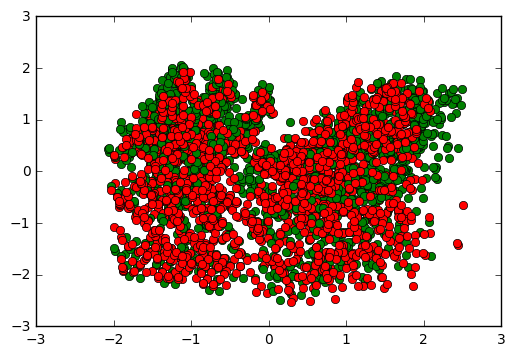

In [6]:
print y[0:50]
from matplotlib import pyplot as plt
colors=['ro','go','bo','y^']
for i in range(len(X)):
    plt.plot(X_pca[i,0],X_pca[i,1],colors[y[i]])
plt.show()

In [7]:
##building the classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from time import time
clf=SVC(kernel="rbf",gamma=0.1,C=1000)
#clf=DecisionTreeClassifier(min_samples_split=40)
#clf=AdaBoostClassifier( n_estimators=50)
t0=time();
clf.fit(X_train_pca,y_train)
print "training time",round(time()-t0,3),"s"
t0=time()
pred=clf.predict(X_test_pca)
print "Predicting time",round(time()-t0,3),"s"
print clf.score(X_test_pca,y_test)

training time 0.061 s
Predicting time 0.029 s
0.9887359199


In [8]:
##color plot
import numpy as np
h=0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired,alpha=0.4)

plt.show()

ValueError: X.shape[1] = 2 should be equal to 25, the number of features at training time